This code is based on Book Hands on Machine Learning - Chapter 3, Classification

In [2]:
import sklearn
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml

# do not get as frame but arrays
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

<function matplotlib.pyplot.show(close=None, block=None)>

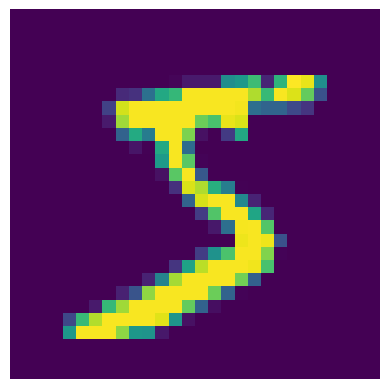

In [6]:
img = X[0].reshape(28,28)

plt.imshow(img)
plt.axis("off")
plt.show

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)

# fit on first 20000 examples
svm_clf.fit(X_train[:20000], y_train[:20000])

SVC(random_state=42)

In [9]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [10]:
# gives score for each word prediction, tells which one with which prob

some_digit_scores = svm_clf.decision_function([X[0]])
some_digit_scores.round(2)

array([[ 2.74,  2.73,  7.25,  8.31, -0.31,  9.31,  0.72,  2.77,  6.22,
         4.84]])

In [11]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

## One vs One and All

you can use these classifiers directly importing from sklearn

You will see for
- **One-vs-Rest:** there are 10 classifiers trained
- **One-vs-One:** there 45 classifiers trained

In [15]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

### **One vs Rest**

In [16]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [14]:
ovr_clf.predict([X[0]])
len(ovr_clf.estimators_)

10

### **One vs One**

In [18]:
ovo_clf = OneVsOneClassifier(SVC(random_state=42))
ovo_clf.fit(X_train[:2000], y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [19]:
ovo_clf.predict([X[0]])
len(ovo_clf.estimators_)

45